# Prediction of adult earnings

This project aims to predict whether an adult's earning is more than or less than 50K.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd D:\New

D:\New


In [3]:
# import file using pandas
df = pd.read_csv('Earnings.csv')
df.head()

,age,work class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hrs per week,country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploratory analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
work class        48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
edu-num           48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital loss      48842 non-null int64
hrs per week      48842 non-null int64
country           48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


here, .info() function shows that there are no null values, but there were some missing values in the data description.
So we check if values are in '?' instead of null.

In [5]:
# check whether there are '?' in the data
df[df==' ?'].count()

age                  0
work class        2799
fnlwgt               0
education            0
edu-num              0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital loss         0
hrs per week         0
country            857
class                0
dtype: int64

In [6]:
# replace all '?' with null
df.replace(' ?',np.nan,inplace=True)

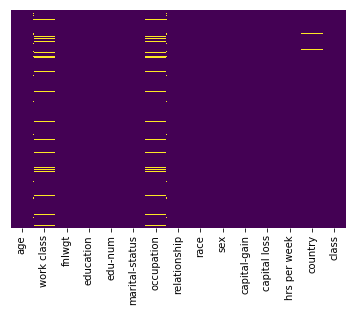

In [7]:
# visualize missing .isnull() using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It clearly shows that there are missing values in 'work class', 'occupation', and 'country' columns.

#### Dealing with missing values

In [8]:
# check distribution of countries
df['country'].value_counts().head()

 United-States    43832
 Mexico             951
 Philippines        295
 Germany            206
 Puerto-Rico        184
Name: country, dtype: int64

No. of people from US is ways ahead of any other countries in this data, so we replace all missing data in 'country' with most recenct class, i.e. United-States

In [9]:
# replace null values with United States in 'country'
df['country'].replace(np.nan,' United-States',inplace=True)

In [10]:
# check if there are common missing values in both 'work class' and 'occupation'
df[df['work class'].isnull()]

,age,work class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hrs per week,country,class
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


Here we can see all the missing values in 'work class' are also missing in 'occupation' column.

Since there is no clear indication of replacing these classes, we must drop all rows.

In [11]:
# drop all null rows from 'work class'
df.dropna(subset=['work class'],inplace=True)

In [12]:
# check remaining null values from 'occupation'
df[df['occupation'].isnull()]

,age,work class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hrs per week,country,class
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
41346,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
44168,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
46459,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K


So rest of the rows have null instances in 'occupation' because these people have never worked, as seen from 'work class'

In [13]:
# simply replace null instance with 'None'
df.fillna('None',inplace=True)

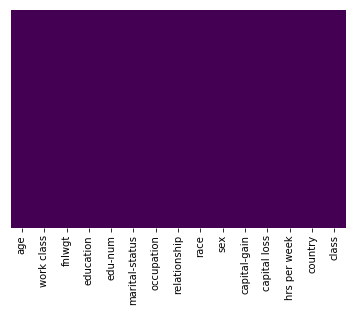

In [14]:
# check if still some nulls remaining
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we are done with dealing with the missing values, now we shall encode all categorical variables to num classes,
we use sklearn's label encoder for features with more number of categories

#### Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
# make a copy of data frame
df_feat = df
df_feat.head()

,age,work class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hrs per week,country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
# include all categorical features with more than 3 classes
feat = ['work class','occupation','marital-status','relationship','country','race']

# for loop to convert them all at once
for col in feat:
    df_feat[col]=le.fit_transform(df_feat[col])
df_feat.head()

,age,work class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hrs per week,country,class
0,39,6,77516,Bachelors,13,4,0,1,4,Male,2174,0,40,38,<=50K
1,50,5,83311,Bachelors,13,2,3,0,4,Male,0,0,13,38,<=50K
2,38,3,215646,HS-grad,9,0,5,1,4,Male,0,0,40,38,<=50K
3,53,3,234721,11th,7,2,5,0,2,Male,0,0,40,38,<=50K
4,28,3,338409,Bachelors,13,2,9,5,2,Female,0,0,40,4,<=50K


In [19]:
# use pandas' get_dummies() function for features with less than 3 classes

df_feat['sex'] = pd.get_dummies(df_feat['sex'],drop_first=True)
df_feat['class'] = pd.get_dummies(df_feat['class'],drop_first=True)

In [20]:
# check if data is ready for modelling
df_feat.head()

,age,work class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hrs per week,country,class
0,39,6,77516,Bachelors,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,11th,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0


We have completed encoding the categorical features to dummy numerical classes.

Note that here we haven't encoded 'education' column since the numerical counter part 'edu-num' was already available in our data. So we simply ignore 'educaton' column or we can even drop that.

### Visualization

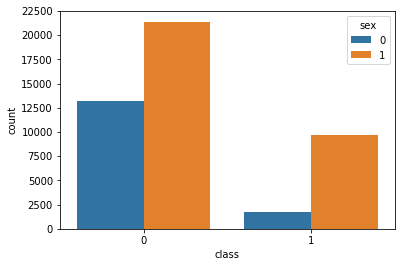

In [21]:
# To check relation of class with sex attribute
sns.countplot(x='class',data=df,hue='sex')

although there are more males in the data, but in class of earning >50K, number of males is roughly 5 times of the females.

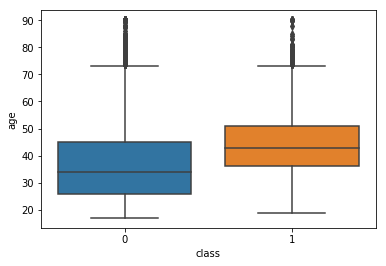

In [22]:
# see relation between class and age
sns.boxplot(x='class',y='age',data=df)

Looks like people with higher salary have more average age than the other, that makes sense as salary/earning increase with age.

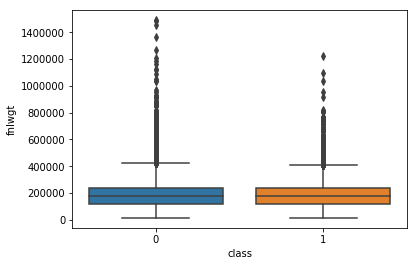

In [23]:
sns.boxplot(x='class',y='fnlwgt',data=df)

In [24]:
df[['fnlwgt','class']].corr()

,fnlwgt,class
fnlwgt,1.000000,-0.006891
class,-0.006891,1.000000


The boxplot of 'fnlwgt' vs 'class' shows too many outliers with very similiar distribution for both the target class values.
The 'fnlwgt' may mislead our model to wrong conclusions or may give no effect if not less.

To check this we calculate coorelation of these 2 columns, and since it is extremely low, it confirms our assumption and thus we will drop this feature.

### Train-test split

split with test set 30%

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# taking into account only important features
X = df_feat[['age', 'work class', 'edu-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital loss', 'hrs per week', 'country']]
y = df_feat['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=70)

### Model

In [27]:
# using K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# algorithm to find the optimum K value
err = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    err.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error')

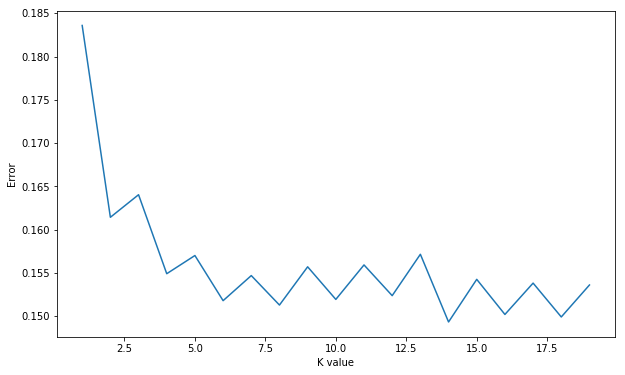

In [30]:
# plot the error vs K value
plt.figure(figsize=(10,6))
plt.plot(range(1,20),err)
plt.xlabel('K value')
plt.ylabel('Error')

In [31]:
# looks like error converges to minimum at K=14
# what we can also do is move ahead with K=6, since improvent in our model slows down after this value
knn = KNeighborsClassifier(n_neighbors=6)

In [32]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print('confusion matrix = \n',confusion_matrix(y_test,pred))
print('\n',classification_report(y_test,pred))

confusion matrix = 
 [[9765  668]
 [1429 1951]]

              precision    recall  f1-score   support

          0       0.87      0.94      0.90     10433
          1       0.74      0.58      0.65      3380

avg / total       0.84      0.85      0.84     13813



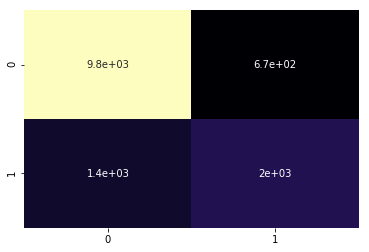

In [36]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='magma',cbar=False)

The model 84.8% accurate.

If we would have chosen K=14, model would have been above 85% accurate, but not to trade complexity with little extra accuracy we settle with K=6.